## 제6장. 머신러닝
## 제7절. 의사결정나무
### 1. 분류
(1) scikit-learn의 DecisionTreeClassifier
* 코드 실습

In [1]:
import pandas as pd
credit = pd.read_csv('../data/credit_final.csv')
credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [2]:
feature_columns = list(credit.columns.difference(['credit.rating']))
X = credit[feature_columns]
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify =y, test_size =0.3, random_state =1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 20)
(300, 20)
(700,)
(300,)


In [3]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth =5)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred=clf.predict(x_test)
test_cm=confusion_matrix(y_test, pred)
test_acc=accuracy_score(y_test, pred)
test_prc=precision_score(y_test, pred)
test_rcll=recall_score(y_test, pred)
test_f1=f1_score(y_test, pred)
print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc *100,2)))
print('정밀도\t{}%'.format(round(test_prc *100,2)))
print('재현율\t{}%'.format(round(test_rcll *100,2)))

[[ 28  62]
 [ 26 184]]


정확도	70.67%
정밀도	74.8%
재현율	87.62%


In [5]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.52      0.31      0.39        90
           1       0.75      0.88      0.81       210

    accuracy                           0.71       300
   macro avg       0.63      0.59      0.60       300
weighted avg       0.68      0.71      0.68       300



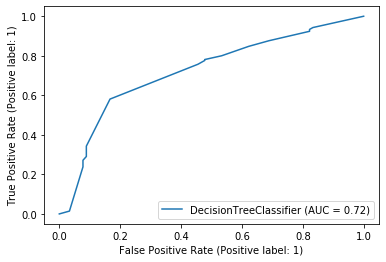

ROC_AUC_score :  0.7221428571428572


In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score
plot_roc_curve(clf, x_test, y_test)
plt.show()
R_A_score = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
print('ROC_AUC_score : ', R_A_score)

In [7]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(X.columns)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

                        feature_nm  importances
0                  account.balance     0.263282
1                              age     0.112494
2                   apartment.type     0.021665
3                     bank.credits     0.000000
4                    credit.amount     0.098532
5           credit.duration.months     0.187908
6                   credit.purpose     0.059083
7                   current.assets     0.000000
8                       dependents     0.000000
9              employment.duration     0.000000
10                  foreign.worker     0.000000
11                       guarantor     0.000000
12                installment.rate     0.000000
13                  marital.status     0.016325
14                      occupation     0.000000
15                   other.credits     0.034003
16  previous.credit.payment.status     0.123825
17              residence.duration     0.020960
18                         savings     0.061923
19                       telephone     0

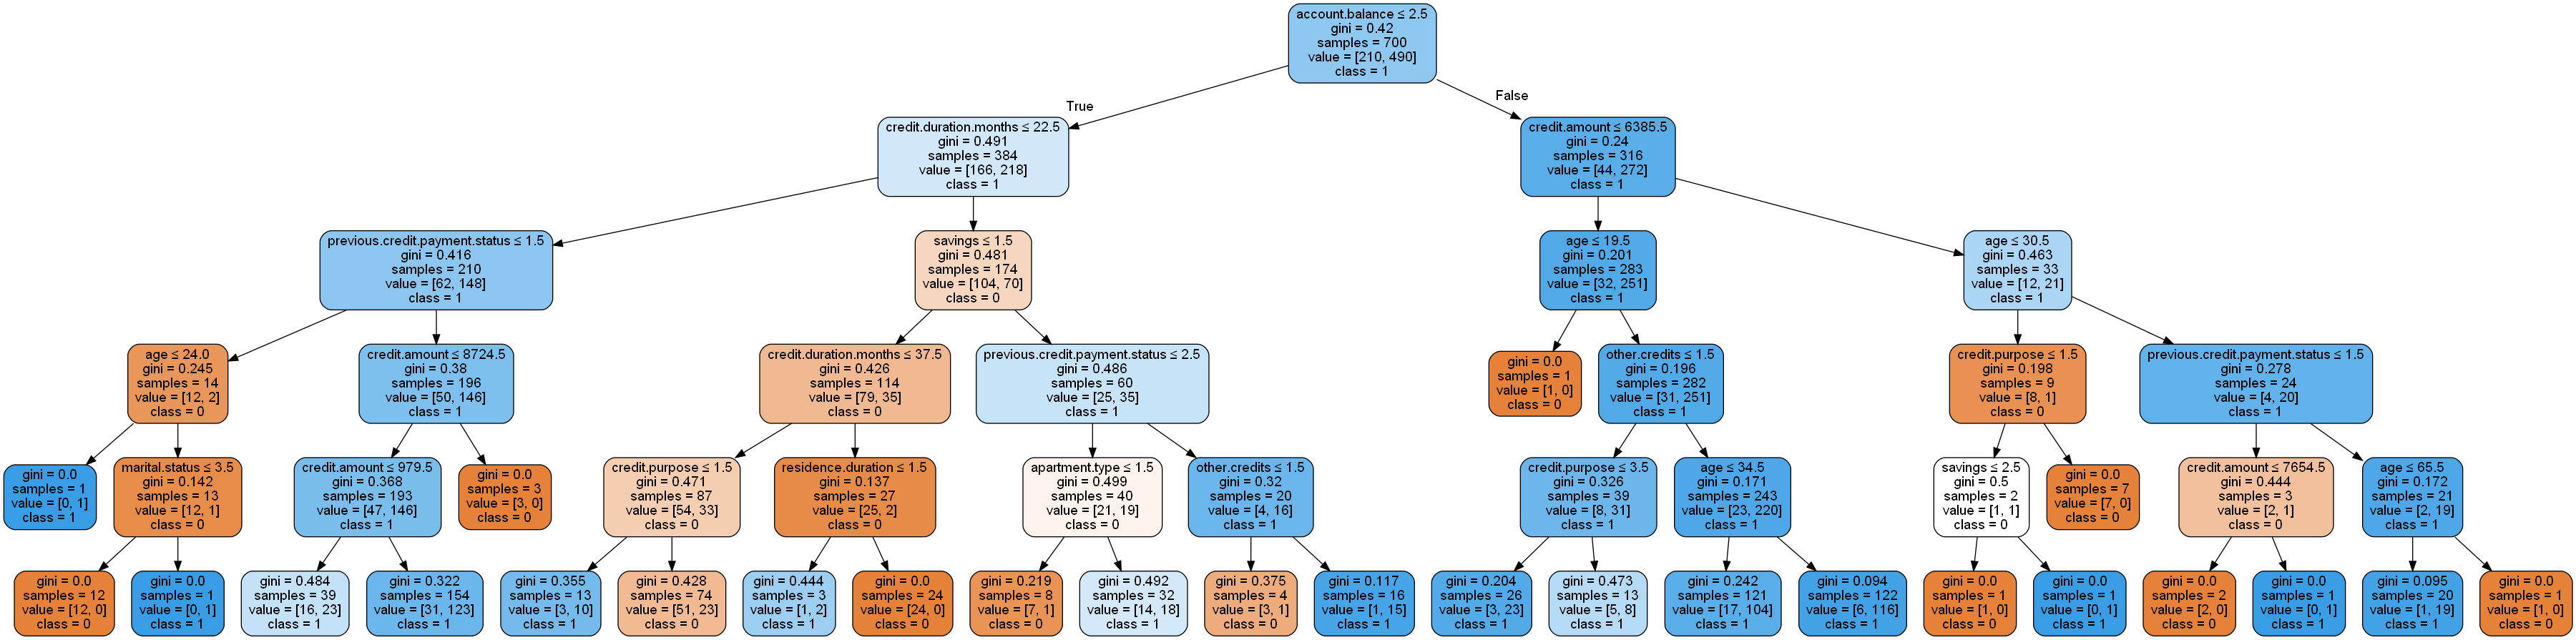

In [8]:
import numpy as np
feature_names = feature_columns
target_names = np.array(['0', '1'])

import pydot
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
dt_dot_data = export_graphviz(clf, feature_names = feature_names,
                              class_names = target_names,
                              filled=True, rounded =True,
                              special_characters=True)
dt_graph=pydotplus.graph_from_dot_data(dt_dot_data)

from IPython.display import Image
Image(dt_graph.create_png())

### 2. 회귀
(1) scikit-learn의 DecisionTreeRegressor
* 코드 실습

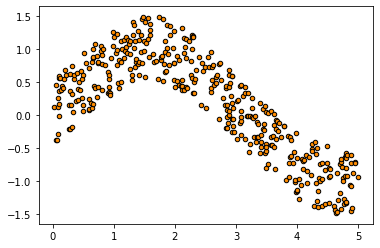

In [9]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# 임의 데이터 생성하기
np.random.seed(0)
X = np.sort(5 * np.random.rand(400, 1), axis =0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

#노이즈 추가하기
y[::1] +=1 * (0.5 - np.random.rand(400))
plt.scatter(X, y, s=20, edgecolor ="black", c ="darkorange", label ="data")

In [10]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y,train_size =0.7, random_state =1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(280, 1) (120, 1) (280,) (120,)


In [11]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
y_1 = regr_1.fit(train_x, train_y).predict(test_x)
y_2 = regr_2.fit(train_x, train_y).predict(test_x)
preds = [y_1, y_2]
weights = ["max depth = 2", "max depth = 5"]
evls = ['mse', 'rmse', 'mae']
results=pd.DataFrame(index =weights,columns =evls)
for pred, nm in zip(preds, weights):
    mse = mean_squared_error(test_y, pred)
    mae = mean_absolute_error(test_y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse']=round(mse,2)
    results.loc[nm]['rmse']=round(rmse,2)
    results.loc[nm]['mae']=round(mae,2)

results

,mse,rmse,mae
max depth = 2,0.12,0.35,0.29
max depth = 5,0.12,0.35,0.3


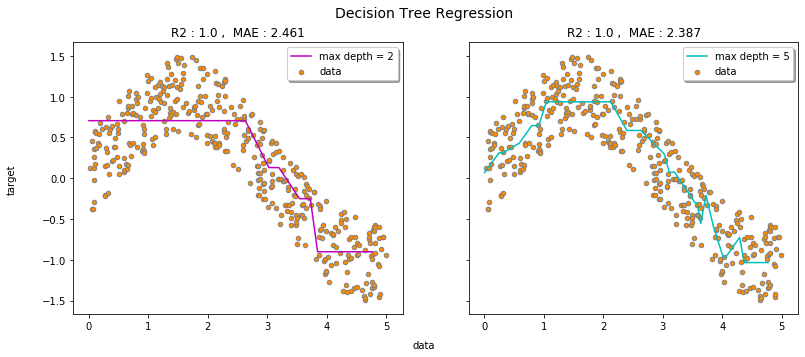

In [13]:
X_test = np.sort(5 * np.random.rand(40, 1), axis=0)

regrs=[regr_1, regr_2]
depths=["max depth = 2", "max depth = 5"]
model_color=["m", "c"]
fig, axes = plt.subplots(nrows =1, ncols =2, sharey =True, figsize =(13, 5))
for ix, regr in enumerate(regrs):
    pred = regr.fit(X,y).predict(X_test)
    r2 = regr.score(X_test, pred)
    mae=mean_absolute_error(X_test, pred)
    
    axes[ix].plot(X_test,
                  pred,
                  color=model_color[ix],
                  label="{}".format(depths[ix])
                 )
    axes[ix].scatter(X, y, 
                     s=20, 
                     edgecolor="gray", 
                     c="darkorange", 
                     label="data")
    axes[ix].legend(loc="upper right",
                   ncol=1,
                   fancybox=True,
                   shadow=True)
    axes[ix].set_title("R2 : {r} ,  MAE : {m}".format(r =round(r2,3), m =round(mae, 3)))
fig.text(0.5, 0.04, "data", ha ="center", va ="center")
fig.text(0.06, 0.5, "target", ha ="center", va ="center", rotation ="vertical")
fig.suptitle("Decision Tree Regression", fontsize =14)
plt.show()